In [1]:
import hydra
import torch

from omegaconf import DictConfig, OmegaConf
from hydra.core.global_hydra import GlobalHydra
from hydra import compose, initialize


import sys

sys.path.append("../")

from complex_neural_source_localization.dataset import load_multichannel_wav
from complex_neural_source_localization.model import DOACNet
from complex_neural_source_localization.utils.model_visualization import (
    plot_multichannel_spectrogram,
    plot_model_output
)
from complex_neural_source_localization.trainer import DOACNetLightniningModule


In [2]:
GlobalHydra.instance().clear()
initialize(config_path="../config")
config = compose("config")

MODEL_CHECKPOINT_PATH = "/Users/ezajlerg/datasets/complex_valued_source_localization/weights.ckpt"
checkpoint = torch.load(MODEL_CHECKPOINT_PATH, map_location=torch.device('cpu'))

model = DOACNetLightniningModule(config)
model.model.track_feature_maps()
model.eval()
model.load_state_dict(checkpoint["state_dict"])


sample = load_multichannel_wav("../tests/fixtures/0.0_split1_ir0_ov1_3.wav", 16000, 1)


model_output = model(sample.unsqueeze(0))


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

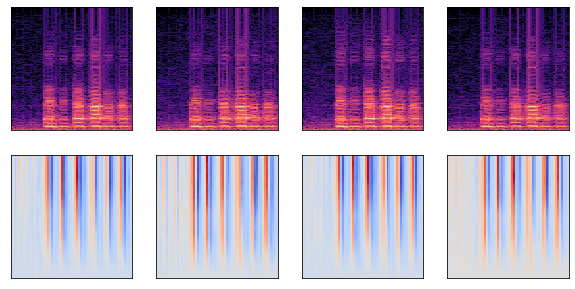

In [3]:
plot_multichannel_spectrogram(model.model.feature_maps["stft"][0])

In [5]:
plot_model_output(model.model.feature_maps, output_dir_path="../tests/temp/model_visualization")